In [1]:
# %pip install numpy pandas sqlalchemy

In [1]:
import numpy as np
import pandas as pd

# Reorganizing Data in DataFrames

## Concatenation / Appends

The `pd.concat()` fucntion and `DataFrame.append()` method takes DataFrames with identical columns and makes a DataFrame that is **taller** than either of them by stacking them on top of each other.

For example, it can turn this `df1` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |

and this `df2` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Wednesday | Sunny   |
| Thursday | Rainy |

into this:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |
| Wednesday | Sunny   |
| Thursday | Rainy |


with one line of code:

```python
pd.concat([df1, df2])
```

**Note:** If you'd like pandas to ignore the index of the dataframes when appending them, the following option is helpful:

```python
pd.concat([df1, df2], ignore_index=True)
```

**Note:** With the `pd.concat()` function, you can concatenate as many dataframes in one step as you want!

#### Exercise

Let's practice concatenating DataFrames with the `pd.concat` function:

In [2]:
df1 = pd.DataFrame({'Name': ['Jackson', 'Josh', 'Jenny'], 'Age': [16, 19, 17]})
df1

,Name,Age
0,Jackson,16
1,Josh,19
2,Jenny,17


In [5]:
df2 = pd.DataFrame({'Age': [21, 16, 23], 'Name': ['Jess', 'Jon', 'Joe'],}, index=[3, 4, 5])
df2

,Age,Name
3,21,Jess
4,16,Jon
5,23,Joe


In [4]:
df3 = pd.DataFrame({'Name': ['Jill', 'Josephine', 'Jack'], 'Age': [5, 10, 61]})
df3

,Name,Age
0,Jill,5
1,Josephine,10
2,Jack,61


**Example**: Concatenate df1 and df2 together!

In [8]:
pd.concat([df1, df2])

,Name,Age
0,Jackson,16
1,Josh,19
2,Jenny,17
3,Jess,21
4,Jon,16
5,Joe,23


Concatenate df2 and df3 together!

In [12]:
pd.concat([df2, df3], ignore_index=True)

,Age,Name
0,21,Jess
1,16,Jon
2,23,Joe
3,5,Jill
4,10,Josephine
5,61,Jack


Concatenate all three dataframes in a single line

In [14]:
import seaborn as sns

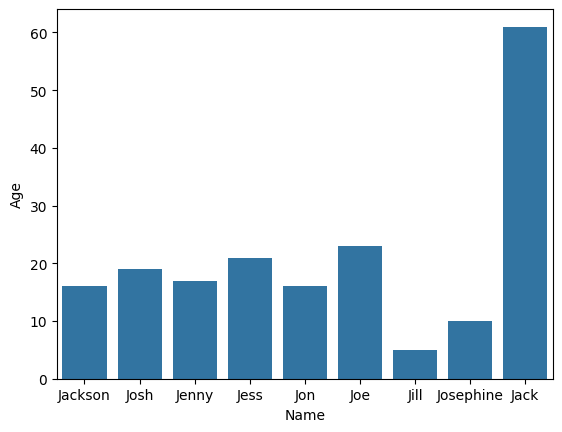

In [16]:
sns.barplot(data=pd.concat([df1, df2, df3], ignore_index=True), x='Name', y='Age');

The index in these datasets is unlabelled, indicating that they potentially don't contain useful data.  Concatenate them all together so that the index of the final dataframe is simply 0-8.

## Merge / Joins
The `pd.merge()` function and `DataFrame.join()` method take two DataFrames and make them **wider** by matching rows with the same values on a specified column.  

For example, it can turn this `df1` DataFrame:

| Day | Weather |
| :-: | :---:   |
| Monday | Sunny   |
| Tuesday | Rainy |

and this `df2` DataFrame:

| Day | Temperature |
| :-: | :---:   |
| Tuesday | 12   |
| Monday | 18 |

into this:

| Day | Weather | Temperature |
| :-: | :---:   | :---: |
| Monday | Sunny   | 18 |
| Tuesday | Rainy | 12 |

with one line of code:

```python
df_merged = pd.merge(left=df1, right=df2, left_on="Day", right_on="Day")
```

Just specify which columns should be matched up with each other, and it will search for the matching values automatically!  If you want it to use the index, you can alternatively supply the option `left_index=True` and/or `right_index=True`. 

### Exercises

Let's practice merging dataframes with the `pd.merge()` function.

Dataframe 1:

In [17]:
df1 = pd.DataFrame({'Name': ['Paul', 'Arash', 'Jenny'], 'Age': [16, 19, 17]})
df1

,Name,Age
0,Paul,16
1,Arash,19
2,Jenny,17


Dataframe 2:

In [26]:
df2 = pd.DataFrame({'Name': ['Arash', 'Paul', 'Sara'], 'Weight': [32, 15, 37]})
df2

,Name,Weight
0,Arash,32
1,Paul,15
2,Sara,37


Dataframe 3:

In [19]:
df3 = pd.DataFrame({'Name': ['Amy', 'Paul', 'Sara'], 'Height': [170, 190, 143]})
df3

,Name,Height
0,Amy,170
1,Paul,190
2,Sara,143


Merge the first two dataframes together.  Who do we know both the age and weight of?

In [25]:
pd.merge(left=df1, right=df2, left_on="Name", right_on="PersonName")

,Name,Age,PersonName,Weight
0,Paul,16,Paul,15
1,Arash,19,Arash,32


Try merging all 3 by merging twice.  Who do we know everything about?

In [27]:
pd.merge(left=df1, right=df2).merge(right=df3)

,Name,Age,Weight,Height
0,Paul,16,15,190


Note that the Names that weren't present in both dataframes dropped out of the final result.  If you'd like to keep them and have NaNs appear, you can change the `how` parameter in the `pd.merge()` function.  Let's try out a few options by merging dataframes 1 and 2:

`how="outer"`

In [30]:
pd.merge(left=df1, right=df2, how='outer').merge(right=df3, how='outer')

,Name,Age,Weight,Height
0,Amy,NaN,NaN,170.0
1,Arash,19.0,32.0,NaN
2,Jenny,17.0,NaN,NaN
3,Paul,16.0,15.0,190.0
4,Sara,NaN,37.0,143.0


`how="left"`

`how="right"`

`how="inner"`

Recognizing that multiple inner joins can result in high data attrition, what policies would you put in your future data analyses to both prevent data loss and keep data easy to analyze?

## Melts

The `pd.melt()` function and `DataFrame.melt()` method take a single dataframe and make it **taller** by taking data stored in column names and putting it into the rows along with the rest of the data, adding extra metadata in the process.

For example, it can turn this `df` DataFrame:

| Month | Year | Monday | Tuesday | Wednesday |
| :--:  | :--: | :--:   | :--:    | :--:      |
| January | 2021 | 0 | -2 | -1 |
| February | 2021 | 2 | 4 | -2 |

into this:

| Month | Year | Weekday | Temperature |
| :--:  | :--: | :--:    |  :--:       |
| January | 2021 | Monday | 0 |
| January | 2021 | Tuesday | -2 |
| January | 2021 | Wednesday | -1 |
| February | 2021 | Monday | 2 |
| February | 2021 | Tuesday | 4 | 
| February | 2021 | Wednesday | -2 |

with one line of code:

```python
pd.melt(
    df, 
    id_vars=['Month', 'Year'],  # The columns that should stay the same
    value_vars=['Monday', 'Tuesday', 'Wednesday'],   # The columns that should melt
    var_name='Weekday',  # The new Column that will represent the melted column name's variable
    value_name='Temperature'  # The new Column that the data represents
)
```

**Note**: Melting a dataframe also called *"tidying"* data, making a *"long"* dataframe from a *"wide"* dataframe, or building a *design matrix*

#### Exercises

Let's practice tidying dataframes with the `pd.melt()` function. 

In [31]:
df = (
    pd.read_csv('https://raw.githubusercontent.com/nickdelgrosso/CodeTeachingMaterials/main/datasets/worldbankdata.csv')
    .get(['Country Name', 'Country Code', '1960', '1970', '1980', '1990', '2000'])
    .sample(10)
    .reset_index(drop=True)
)
df.head()

,Country Name,Country Code,1960,1970,1980,1990,2000
0,Senegal,SEN,6.951,7.339,7.382,6.629,5.561
1,Namibia,NAM,6.150,6.459,6.451,5.227,4.033
2,Monaco,MCO,NaN,NaN,NaN,NaN,NaN
3,China,CHN,5.758,5.470,2.710,2.506,1.510
4,Cyprus,CYP,3.500,2.610,2.354,2.411,1.714


Melt this dataset so it has four columns: "Country Name", "Country Code", "Year", and "Fertility Rate"

In [37]:
df.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=["1960", "1970"],
    var_name="Year",
    value_name="FertilityRate",
)

,Country Name,Country Code,Year,FertilityRate
0,Senegal,SEN,1960,6.951
1,Namibia,NAM,1960,6.150
2,Monaco,MCO,1960,NaN
3,China,CHN,1960,5.758
4,Cyprus,CYP,1960,3.500
5,Armenia,ARM,1960,4.550
6,Malta,MLT,1960,3.620
7,Guyana,GUY,1960,5.671
8,Suriname,SUR,1960,6.608
9,"Micronesia, Fed. Sts.",FSM,1960,6.934
